# A Spectral Algorithm for Planted Clique

**Author**: Wilson Wu

Here, we code the AKS spectral algorithm for recovering a planted clique from a $\mathcal{G}_{n,1/2}$ graph. Let's setup the notebook.

In [0]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

## Planted Clique Input

Begin by generating a planted clique input. We start with a $\mathcal{G}_{n,1/2}$ graph and plant a clique of size $k$:

In [0]:
def gen_planted_clique(n, k):
    """ Samples a graph from G(n, 1/2) then plants a clique on a set of k 
    vertices chosen uniformly at random. 
    """
    G = nx.erdos_renyi_graph(n, 1/2)
    clique = np.random.choice(n, k, replace=False)
    for i in clique:
        for j in clique:
            G.add_edge(i, j)
    return G

In [0]:
G = gen_planted_clique(200, 50)

When $n=200$ and $k=50$, the clique is (maybe surprisingly) not visible to the naked eye, even with the default spring layout.

In [0]:
def visualize_graph(G, node_color='r', edge_color='k', width=0.2, alpha=0.8):
    plt.figure(figsize=(15, 12))
    nx.draw_networkx(G, node_color=node_color, edge_color=edge_color, width=width, alpha=alpha)

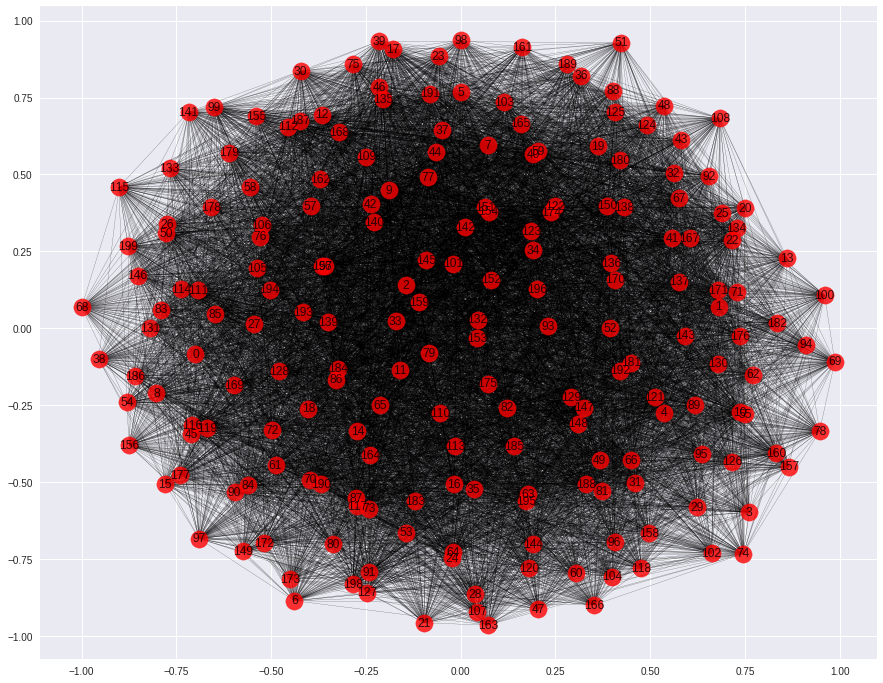

In [73]:
visualize_graph(G)

## The Spectral Algorithm

We can use the spectral algorithm of Alon, Krivelevich, and Sudakov to find the planted clique. In short, we use the fact that the largest eigenvector of $M=A-\frac{1}{2}J$, with $A$ the adjacency matrix and $J$ all ones, is with high probability close to the indicator vector for the planted clique.

In [0]:
def find_clique_aks(G, n, k):
    A = nx.adjacency_matrix(G).toarray()
    M = A - 1/2 * np.ones((n, n))
    lam, v = np.linalg.eig(M)
    x = v[:,lam.tolist().index(max(lam))]
    x = [abs(i) for i in x.tolist()]
    largest = sorted(x, reverse=True)[:k]
    I = [x.index(l) for l in largest]
    adj = np.array([1 if i in I else 0 for i in range(n)])
    A_adj = (A @ adj).tolist()
    return [i for i in range(n) if A_adj[i] >= 0.75 * k]

In [75]:
# Find the clique
clique = find_clique_aks(G, 200, 50)
print(clique)

[2, 5, 7, 9, 12, 17, 19, 23, 30, 32, 33, 34, 36, 37, 39, 40, 42, 44, 46, 56, 59, 67, 75, 77, 92, 93, 99, 101, 103, 105, 112, 123, 132, 135, 138, 140, 142, 145, 150, 151, 152, 154, 155, 159, 162, 168, 174, 179, 191, 197]


Let's visualize the results:

In [0]:
def visualize_clique(G, clique):
    """ Highlights clique vertices in G. """
    clique_edges = G.subgraph(clique).edges()
    node_color = ['r' if n in clique else 'k' for n in G.nodes()]
    edge_color = ['r' if e in clique_edges else 'k' for e in G.edges()]
    width = [1 if e in clique_edges else 0.2 for e in G.edges()]
    visualize_graph(G, node_color=node_color, edge_color=edge_color, width=width, alpha=0.8)

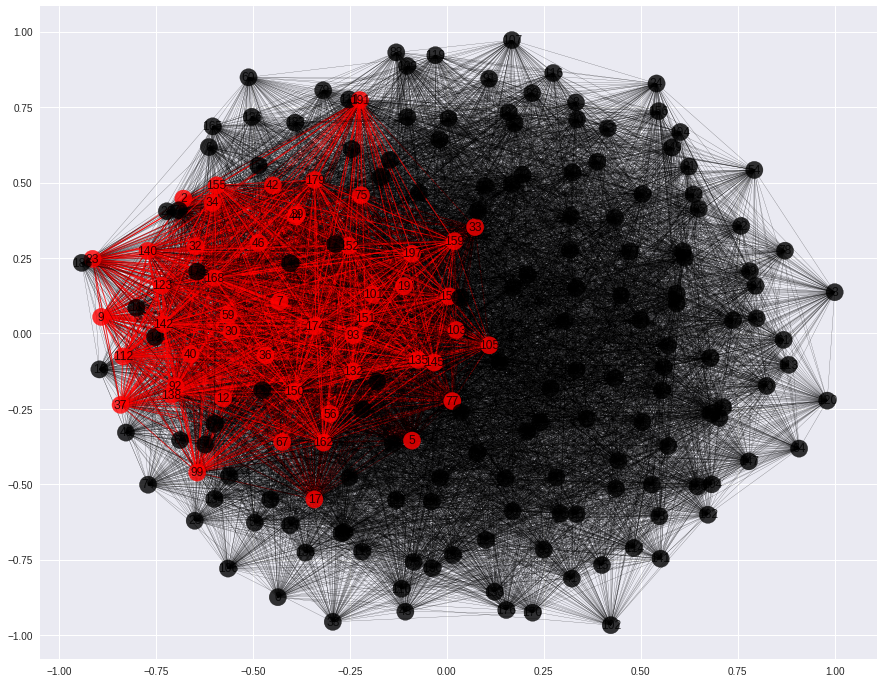

In [77]:
# Visualize the clique in G.
visualize_clique(G, clique)

And check that we indeed have a clique:

In [78]:
def is_clique(G, clique):
    """ Returns true iff the set of vertices "clique" is a clique in G. """
    for i in clique:
        for j in clique:
            if (i, j) not in G.edges():
                return False
    return True

# Check if the selected set of vertices is a clique in G
is_clique(G, clique)

True